# Probabilidad y Estadística
# Trabajo Práctico
\
### Alejo Fábregas - N°106160

En el mercado de smartphones, uno podría pensar que los dispositivos con mayor capacidad de almacenamiento suelen tener baterías más duraderas, dado que suelen ser modelos más premium con mejores especificaciones, incluida la batería. Modelar estos datos podría ayudar a estimar la duración de la batería en función de su capacidad de almacenamiento, algo útil para los consumidores al elegir un nuevo dispositivo. El archivo smart.txt posee valores registrados sobre capacidad de almacenamiento (primera columna en GB) y la respectiva duración de baterías (segunda columna en horas). Utilizando Python o R resolver:

## Imports de librerías

In [1]:
import numpy as np
from scipy import special as sp
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lectura de valores de memoria y batería del archivo smart.txt

X: Capacidad de almacenamiento

Y: Duración de las baterías

In [3]:
smart = open("/content/drive/MyDrive/FIUBA/Probabilidad y Estadística/smart.txt")
memorias = [float(i) for i in smart.readline().split()]
baterias = [float(i) for i in smart.readline().split()]
smart.close()
print("Valores de memoria en GB: ", memorias)
print("Valores de batería en horas: ", baterias)

Valores de memoria en GB:  [172.84104829643016, 181.08695365980853, 83.89491403880365, 131.65234381499482, 125.21975241824794, 115.12617470924312, 135.97476955270588, 136.24924223607766, 104.09362568382798, 147.1836690131817, 206.32946133539537, 125.3291911033174, 110.90017597245225, 111.87051355892316, 118.10066000514905, 102.01561589576876, 100.83438244618581, 102.28354307150931, 154.58141383293074, 185.04318122509915, 147.49515443620163, 159.1619856988624, 175.35153355675504, 99.97703432216214, 93.41549909228843, 157.33033144218098, 144.67721028490894, 149.4995969255692, 139.70408507740424, 115.78444572777327, 133.47811802052323, 65.45669028729553, 121.1585226193281, 155.18078857844068, 98.29554806136194, 83.3078310293815, 143.21640787797324, 142.466470250155, 89.76671571507993, 125.8903278822895, 161.69114049991614, 148.22528568399386, 123.53381762285954, 112.94007254281168, 135.66646728349363, 108.52165521027439, 164.05157669920638, 172.16302855025612, 83.22361077857015, 147.06506

In [4]:
x, y = np.loadtxt("/content/drive/MyDrive/FIUBA/Probabilidad y Estadística/smart.txt")
n = x.shape[0]
print("Cantidad de muestras:", n)

Cantidad de muestras: 1000




---


## 1. Antes de suponer una distribución conocida para cada variable, estimar las varianzas de forma insesgada (y por separado).

Estimador insesgado de la varianza:

$ S²=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})² $

### Cálculo a mano:

In [5]:
promedio_memorias = sum(memorias) / len(memorias)

est_varianza = 0
for i in memorias:
  est_varianza += 1/(len(memorias)-1) * (i - promedio_memorias)**2

print("Promedio de las memorias: ", promedio_memorias)
print("Estimación de la varianza de las memorias: ", est_varianza)

Promedio de las memorias:  127.5803327170385
Estimación de la varianza de las memorias:  1068.2440034213487


In [6]:
array_memorias = np.array(memorias)
est_varianza_np = array_memorias.var(ddof = 1)
print("Estimación de la varianza de las memorias con la función de numpy: ", est_varianza_np)

Estimación de la varianza de las memorias con la función de numpy:  1068.2440034213485


$ \overline{X} = 127.5803327170385 $

$ S² = 1068.2440034213487 $

In [7]:
promedio_baterias = sum(baterias) / len(baterias)

est_varianza = 0
for i in baterias:
  est_varianza += 1/(len(baterias)-1) * (i - promedio_baterias)**2

print("Promedio de las baterías: ", promedio_baterias)
print("Estimación de la varianza de las baterías: ", est_varianza)

Promedio de las baterías:  23.972106259869676
Estimación de la varianza de las baterías:  15.566442716026048


In [8]:
array_baterias = np.array(baterias)
est_varianza_np = array_baterias.var(ddof = 1)
print("Estimación de la varianza de las baterias con la función de numpy: ", est_varianza_np)

Estimación de la varianza de las baterias con la función de numpy:  15.566442716026046


$ \overline{Y} = 23.972106259869676 $

$ S² = 15.566442716026048 $

### Cálculo genérico:

In [9]:
def est_varianza(z):
  return(z.var(ddof = 1))

In [10]:
var_x = est_varianza(x)
var_y = est_varianza(y)
print("Estimación de la varianza de x:", var_x)
print("Estimación de la varianza de y:", var_y)

Estimación de la varianza de x: 1068.2440034213485
Estimación de la varianza de y: 15.566442716026046




---


## 2. Asumiendo que la distribución de la capacidad de almacenamiento es normal, se desea hacer un test para rechazar que la media es $μ_0^x$. Graficar el p-valor en función de $μ_0^x$. Relacionar dicho gráfico con el concepto de nivel de significación. ¿Qué puede decir del punto donde el p-valor alcanza el máximo?

### Test de hipótesis

En este punto asumimos que las memorias tienen una distribución normal, pero no conocemos la media ni la varianza. Como en este caso vamos a hacer inferencia sobre $μ$ con $\sigma$ desconocido en una muestra normal, proponemos:

$\delta(\underline{X})=1\{\sqrt{n}\cdot\frac{\overline{X}-μ_0}{S}<k_\alpha\}$

Ya que si $μ = μ_0$:

$\sqrt{n}\cdot\frac{\overline{X}-μ_0}{S} \sim t_{n-1} $

Se distribuye como una t-Student con n-1 grados de libertad.

\

* Ensayo: $\qquad H_0:μ^x = μ_0^x \qquad H_1:μ^x \neq μ_0^x$

* Propongo el test: $\qquad \delta(\underline{X})=\mathbb{1}\{\sqrt{1000}\cdot\frac{\overline{X}-μ}{S}>k_\alpha\}$

  ya que: $\qquad\sqrt{1000}\cdot\frac{\overline{X}-μ}{S} \sim t_{999} $

* Con: $\qquad p-valor = \mathbb{P}_{μ_0^x}(|T| > \sqrt{1000}\cdot\frac{\overline{X}-μ}{S}) $

t-Student de n-1 grados de libertad (n=1000 para las memorias):

In [11]:
dist_h0 = stats.t(df=n-1)

Definición de la función para calcular el p-valor:

In [12]:
def p_valor(z, u_0, dist_h0):
  S2 = est_varianza(z)
  k_alpha = ((z.shape[0]**0.5) * np.abs(z.mean() - u_0)) / (S2**0.5)
  #p_val = dist_h0.cdf(-k_alpha) - dist_h0.cdf(k_alpha)
  p_val = 1 - (dist_h0.cdf(k_alpha) - dist_h0.cdf(-k_alpha))
  return p_val

Proponemos 5000 posibles valores de $μ_x$ y a cada uno le calculamos el p-valor:

In [13]:
cant_puntos = 5000
u_0_x = np.linspace(x.min(), x.max(), cant_puntos)
p_valor_x = np.zeros(cant_puntos)
for i in range(cant_puntos):
  p_valor_x[i] = p_valor(x, u_0_x[i], dist_h0)

Seleccionamos el $μ_x$ que tiene mayor p-valor:

In [14]:
u_x = u_0_x[np.argmax(p_valor_x)]
print("Valor de μ donde no rechazo, que uso como estimación de la media:", u_x)

Valor de μ donde no rechazo, que uso como estimación de la media: 127.57446262611155


Graficamos los p-valores en función de los $μ_x$:

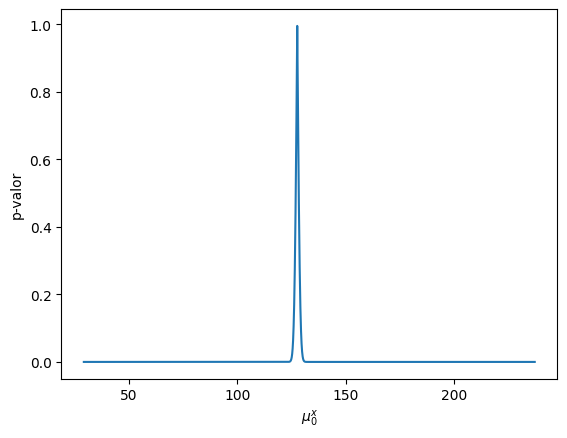

In [15]:
plt.plot(u_0_x, p_valor_x)
plt.xlabel(r"$μ_0^x$")
plt.ylabel("p-valor")
plt.show()

Relación con el nivel de significación:
\
En aquellos casos donde el p-valor es menor al nivel de significación $α$, rechazo la hipótesis nula $H_0:μ^x = μ_0^x$.
\
Si el p-valor es grande, mayor al nivel de significación, no rechazo la hipótesis nula, por lo que asumo que el verdadero $μ^x$ es cercano a $μ_0^x$.



---


## 3. Graficar la función de distribución empírica de la capacidad de almacenamiento y compararla con la curva correspondiente a una normal cuya media corresponda al valor que maximiza el p-valor del inciso 2 y cuya varianza sea la estimada en el inciso 1.

Normal con media que maximiza el p-valor del inciso 2 y con varianza estimada en el inciso 1:

$X \sim \mathcal{N}(127.57446262611155, 1068.2440034213487)$

In [16]:
dist_normal_x = stats.norm(loc = u_x, scale = est_varianza(x)**0.5)
puntos_x = np.linspace(dist_normal_x.ppf(0.01), dist_normal_x.ppf(0.99), 100)

Función de distribución empírica de X

In [17]:
dist_empirica = ECDF(memorias)

Graficamos la función de distribución empírica y la normal calculada

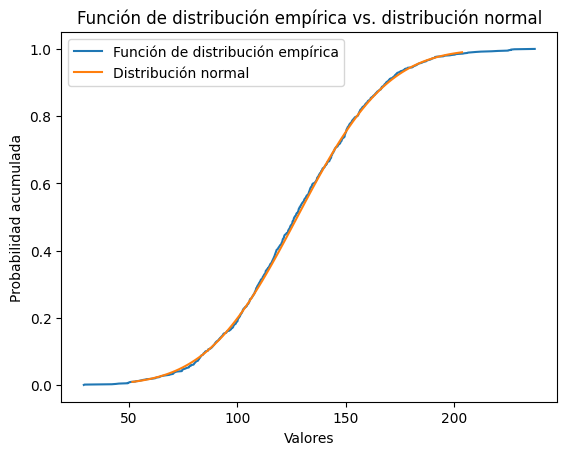

In [18]:
plt.plot(dist_empirica.x, dist_empirica.y, label='Función de distribución empírica')
plt.plot(puntos_x, dist_normal_x.cdf(puntos_x), label='Distribución normal')
plt.legend()
plt.xlabel('Valores')
plt.ylabel('Probabilidad acumulada')
plt.title('Función de distribución empírica vs. distribución normal')
plt.show()



---


## 4. Antes de asumir una distribución conocida para la duración de las baterías, se desea hacer un test para rechazar que la media es $μ^y_0$. Graficar el p-valor asintótico en función de $μ^y_0$. Relacionar dicho gráfico con el concepto de nivel de significación asintótico. ¿Qué puede decir del punto donde el p-valor asintótico alcanza el máximo?

### Test agnóstico

El caso agnóstico se resuelve por TCL y Lema de Slutsky.

Por TCL:

$\frac{\sum_{i=1}^{n}X_i-nμ}{\sqrt{n}σ} \overset{D}{\longrightarrow} \mathcal{N}(0,1)$
\
$\sqrt{n}\frac{(\overline{X}-μ)}{σ} \overset{D}{\longrightarrow} \mathcal{N}(0,1)$
\
Si utilizamos un estimador consistente para σ ($\hat{σ}$), como es el caso de S, que ya calculamos anteriormente:
$\sqrt{n}\frac{(\overline{X}-μ)}{\hat{σ}} = \sqrt{n}\frac{(\overline{X}-μ)}{σ} \cdot \frac{σ}{\hat{σ}} \xrightarrow[Slotsky]{D} \mathcal{N}(0,1)$
\
Ya que por consistencia:
\
$\frac{σ}{\hat{σ}} \xrightarrow[Consistencia]{\mathbb{P}} 1$

\

* Ensayo: $\qquad H_0:μ^y = μ_0^y \qquad H_1:μ^y \neq μ_0^y$

* Propongo el test: $\qquad \delta_n(\underline{X})=\mathbb{1}\{\sqrt{n}\cdot\frac{\overline{X}-μ}{S}>k_\alpha\}$

  ya que: $\qquad\sqrt{n}\cdot\frac{\overline{X}-μ}{S} \sim \mathcal{N}(0,1) $

* Con: $\qquad p-valor = \mathbb{P}_{μ_0^x}(|T| > \sqrt{n}\cdot\frac{\overline{X}-μ}{S}) $

Normal estándar para el p-valor asintótico:

In [19]:
dist_h0_asintotico = stats.norm()

Proponemos 5000 posibles valores de $μ_y$ y a cada uno le calculamos el p-valor asintótico, con la misma función que antes:

In [20]:
cant_puntos = 5000
u_0_y = np.linspace(y.min(), y.max(), cant_puntos)
p_valor_y = np.zeros(cant_puntos)
for i in range(cant_puntos):
  p_valor_y[i] = p_valor(y, u_0_y[i], dist_h0_asintotico)

Seleccionamos el $μ_y$ que tiene mayor p-valor:

In [21]:
u_y = u_0_y[np.argmax(p_valor_y)]
print("Valor de μ donde no rechazo, que uso como estimación de la media:", u_y)

Valor de μ donde no rechazo, que uso como estimación de la media: 23.97331224523656


Graficamos los p-valores en función de los $μ_y$:

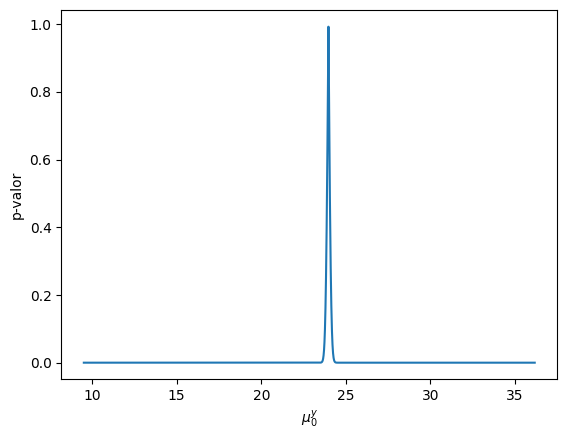

In [22]:
plt.plot(u_0_y, p_valor_y)
plt.xlabel(r"$μ_0^y$")
plt.ylabel("p-valor")
plt.show()

Relación con el nivel de significación asintótico:
\
En aquellos casos donde el p-valor es menor al nivel de significación asintótico $α$, rechazo la hipótesis nula $H_0:μ^y = μ_0^y$.
\
Si el p-valor es grande, mayor al nivel de significación, no rechazo la hipótesis nula, por lo que asumo que el verdadero $μ^y$ es cercano a $μ_0^y$.



---


## 5. Graficar el histograma de la duración de las baterías y compararla con la curva correspondiente a una normal cuya media corresponda al valor que maximiza el p-valor asintótico del inciso 4 y cuya varianza sea la estimada en el inciso 1.

Normal con media que maximiza el p-valor asintótico del inciso 4 y con varianza estimada en el inciso 1.

$Y \sim \mathcal{N}(23.97331224523656, 15.566442716026048)$

In [23]:
dist_normal_y = stats.norm(loc = u_y, scale = est_varianza(y)**0.5)
puntos_y = np.linspace(dist_normal_y.ppf(0.01), dist_normal_y.ppf(0.99), 100)

Graficamos el histograma y la normal calculada

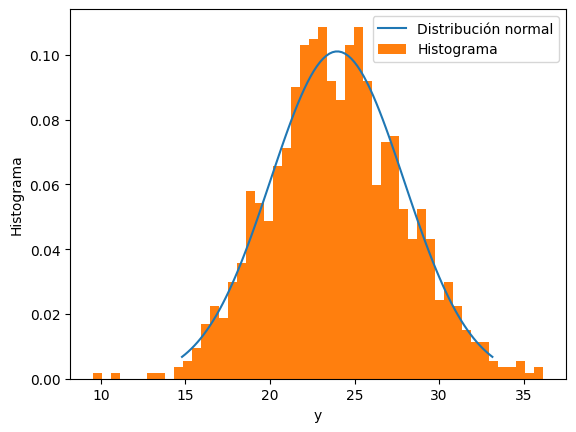

In [24]:
plt.plot(puntos_y, dist_normal_y.pdf(puntos_y), label='Distribución normal')
plt.hist(baterias, bins=50, density=True, label="Histograma")
plt.legend()
plt.xlabel("y")
plt.ylabel("Histograma")
plt.show()



---


## 6. Asumiendo que los datos corresponden a una normal bivariada cuyas medias y varianzas son las utilizadas en los incisos 3 y 5 (asumiendo que son los verdaderos valores y son conocidos), graficar la log-verosimilitud en función de $ρ$. Estimar por máxima verosimilitud el coeficiente de correlación.

Recomendamos seguir los siguientes pasos:
*   Halle una expresión analítica (a mano) para la log-verosimilitud $log(L(ρ)) = \sum_{i=1}^n log \; f_ρ(xi, yi)$.
*   Defina una función que para cada $ρ$ devuelva el valor de $log(L(ρ))$.
*   Construir el gráfico pedido. Para evitar errores numéricos suponer $ρ ∈ [−0.9, 0.9]$.
*   Encuentre el $ρ$ que maximiza $log(L(ρ))$ utilizando **argmax** (numpy).





### Expresión analítica para la log-verosimilitud

\

Verosimilitud:
\
$\mathcal{L}(ρ) = \prod_{i=1}^n f_ρ(x_i)$

\

Como es una normal bivariada, conocemos su función de densidad:
$f_{X,Y}(x,y) = \frac{1}{2\piσ_xσ_y\sqrt{1-ρ^2}} \cdot exp(\frac{-1}{2(1-ρ^2)}[\frac{(x-u_x)^2}{σ_x^2}+\frac{(y-u_y)^2}{σ_y^2}]-\frac{2ρ(x-u_x)(y-u_y)}{σ_xσ_y})$

\

Por lo que la verosimilitud en este caso nos queda:
$\mathcal{L}(ρ) = \prod_{i=1}^n \frac{1}{2\piσ_xσ_y\sqrt{1-ρ^2}} \cdot exp(\frac{-1}{2(1-ρ^2)}[\frac{(x-u_x)^2}{σ_x^2}+\frac{(y-u_y)^2}{σ_y^2}]-\frac{2ρ(x-u_x)(y-u_y)}{σ_xσ_y})$

\

Aplicamos logaritmo para obtener la log-verosimilitud:
$log(\mathcal{L}(ρ)) = log(\prod_{i=1}^n \frac{1}{2\piσ_xσ_y\sqrt{1-ρ^2}} \cdot exp(\frac{-1}{2(1-ρ^2)}[\frac{(x-u_x)^2}{σ_x^2}+\frac{(y-u_y)^2}{σ_y^2}]-\frac{2ρ(x-u_x)(y-u_y)}{σ_xσ_y}))$

\

Simplificando:
\
$log(\mathcal{L}(ρ)) = log(\prod_{i=1}^n \frac{1}{2\piσ_xσ_y\sqrt{1-ρ^2}}) + log(\prod_{i=1}^nexp(\frac{-1}{2(1-ρ^2)}[\frac{(x-u_x)^2}{σ_x^2}+\frac{(y-u_y)^2}{σ_y^2}]-\frac{2ρ(x-u_x)(y-u_y)}{σ_xσ_y}))$

$log(\mathcal{L}(ρ)) = \sum_{i=1}^nlog(\frac{1}{2\piσ_xσ_y\sqrt{1-ρ^2}}) + \sum_{i=1}^nlog(exp(\frac{-1}{2(1-ρ^2)}[\frac{(x-u_x)^2}{σ_x^2}+\frac{(y-u_y)^2}{σ_y^2}]-\frac{2ρ(x-u_x)(y-u_y)}{σ_xσ_y}))$

$log(\mathcal{L}(ρ)) = n \cdot log(\frac{1}{2\piσ_xσ_y\sqrt{1-ρ^2}}) + \sum_{i=1}^n(\frac{-1}{2(1-ρ^2)}[\frac{(x-u_x)^2}{σ_x^2}+\frac{(y-u_y)^2}{σ_y^2}]-\frac{2ρ(x-u_x)(y-u_y)}{σ_xσ_y})$

Función que devuelve el valor de $log(L(ρ))$ para cada $ρ$:

In [25]:
def log_verosimilitud(r, x, y, u_x, u_y, var_x, var_y):
  logL = n * np.log(1/(2*np.pi*np.sqrt(var_x)*np.sqrt(var_y)*np.sqrt(1-r**2))) + np.sum((-1/(2*(1-r**2)))*((((x-u_x)**2)/var_x)+(((y-u_y)**2)/var_y)-((2*r*(x-u_x)*(y-u_y))/(np.sqrt(var_x)*np.sqrt(var_y)))))
  return logL

Calculamos la log verosimilitud para 1000 puntos de $ρ$ entre -0.9 y 0.9:

In [26]:
cant_puntos = 1000
rs = np.linspace(-0.9, 0.9, cant_puntos)
logL = [log_verosimilitud(r, x, y, u_x, u_y, var_x, var_y) for r in rs]

Obtenemos el $ρ$ con la máxima log verosimilitud:

In [27]:
rho = rs[np.argmax(logL)]
print("Coeficiente de correlación (rho) de máxima log verosimilitud:", rho)

Coeficiente de correlación (rho) de máxima log verosimilitud: 0.49099099099099097


Graficamos la log verosimilitud en función de los $ρ$:

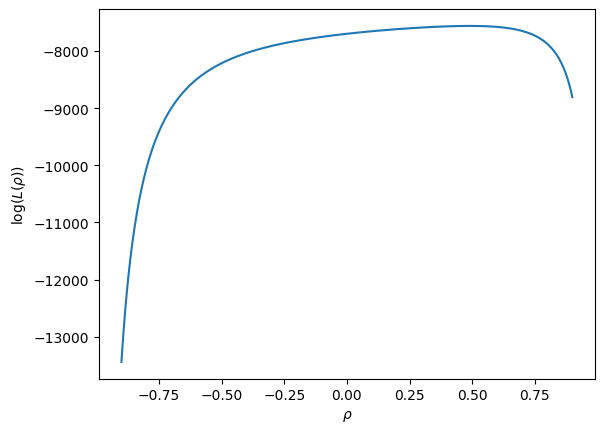

In [28]:
plt.plot(rs, logL)
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\log(L(\rho))$")
plt.show()



---


## 7. Asumiendo la distribución del inciso 6, utilizando como coeficiente de correlación su estimación, hallar la recta de regresión. Graficar los datos con una nube de puntos y superponer la recta de regresión sobre ellos. Utilice la recta para estimar cuánto duraría la batería de un smartphone de 256GB de almacenamiento.


Utilice **scatter** (matplotlib) para el gráfico.

Tenemos una normal bivariada:
\
$(X, Y) \sim \mathcal{N_2}(μ_x, μ_y, \sigma_x, \sigma_y, \rho)$
\
Por propiedades de normal bivariada:
\
$X|Y=y \sim \mathcal{N}(μ_x + \frac{\rho\sigma_x}{\sigma_y} (y-μ_y), μ_x^2(1-\rho^2)$
\
$Y|X=x \sim \mathcal{N}(μ_y + \frac{\rho\sigma_y}{\sigma_x} (x-μ_x), μ_y^2(1-\rho^2)$
\
En una normal bivariada, la recta de regresión se puede obtener con la función de regresión:
\
$\phi(x) = E[Y|X=x] = μ_y + \frac{\rho\sigma_y}{\sigma_x} (x-μ_x)$
\
Como es lineal, esa es la recta de regresión.

In [29]:
def recta_regresion(x, u_x, u_y, var_x, var_y, rho):
  y = u_y + (rho*np.sqrt(var_y)/np.sqrt(var_x)) * (x-u_x)
  return y

In [30]:
print("La batería de un smartphone de 256GB de almacenamiento duraría:", recta_regresion(256, u_x, u_y, var_x, var_y, rho), "horas.")

La batería de un smartphone de 256GB de almacenamiento duraría: 31.58505972710851 horas.


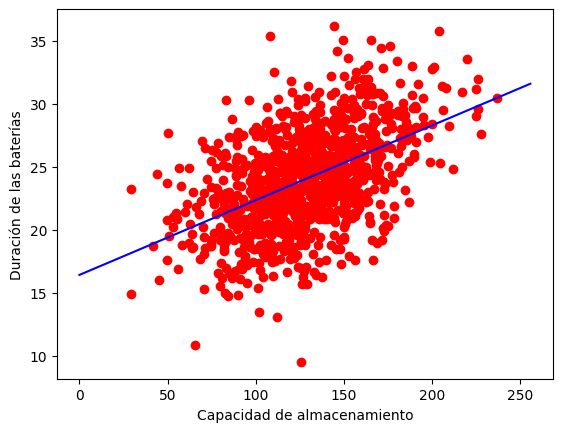

In [31]:
plt.scatter(x, y, c="red")
plt.plot([0, 256], [recta_regresion(0, u_x, u_y, var_x, var_y, rho), recta_regresion(256, u_x, u_y, var_x, var_y, rho)], "b")
plt.xlabel("Capacidad de almacenamiento")
plt.ylabel("Duración de las baterías")
plt.show()